In [ ]:
https://www.kaggle.com/datasets/andrewmvd/udemy-courses

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('/Users/karishmagupta/Downloads/udemy_courses.csv.xls', parse_dates=['published_timestamp'])
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


In [18]:
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [22]:
print("rows",data.shape[0])
print("columns",data.shape[1])

rows 3678
columns 12


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [26]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

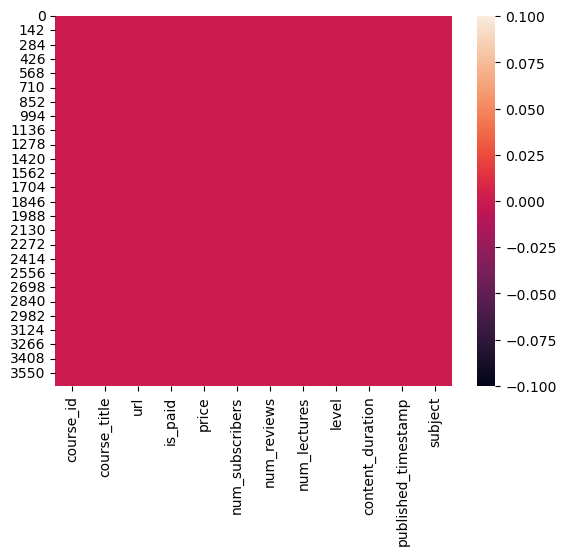

In [37]:
sns.heatmap(data.isnull())

In [32]:
print("Any missing value ?",data.isnull().values.any())

Any missing value ? False


**Check For Duplicate Data and Drop Them**

In [39]:
dup_value = data.duplicated().any()
print("Duplicate values?",dup_value)

Duplicate values? True


In [41]:
data=data.drop_duplicates()

In [43]:
dup_value = data.duplicated().any()
print("Duplicate values?",dup_value)

Duplicate values? False


**Find Out Number of Courses Per Subjects**

In [46]:
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [50]:
data['subject'].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

Text(0.5, 0, 'Number of Courses per Subject')

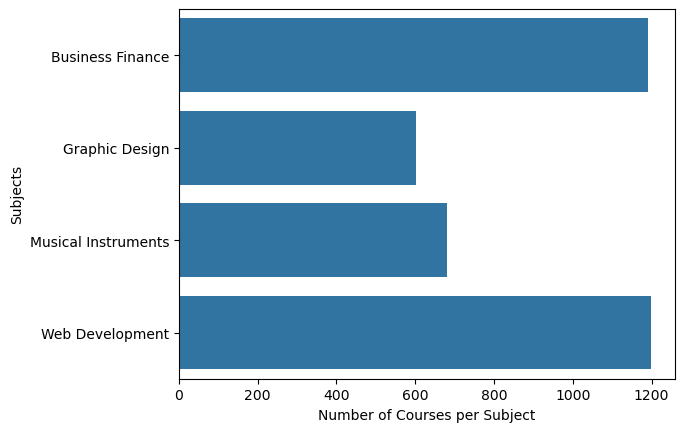

In [58]:
sns.countplot(data['subject'])
plt.ylabel("Subjects")
plt.xlabel("Number of Courses per Subject")

**For Which Levels, Udemy Courses Providing The Courses**

In [65]:
data['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='level'>

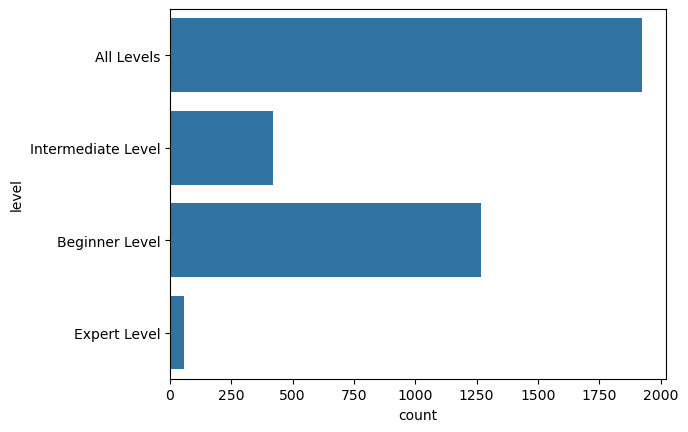

In [67]:
sns.countplot(data['level'])


**Display The Count of Paid and Free Courses** 

In [72]:
data['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

In [ ]:
sns.countplot(data['is_paid'])


**Which Course Has More Lectures (Free or Paid)?**

In [ ]:
data.groupby(['is_paid']).mean()

In [92]:
data.groupby('is_paid')['num_lectures'].mean()


is_paid
False    21.416129
True     41.866746
Name: num_lectures, dtype: float64

**Which Courses Have A Higher Number of Subscribers Free or Paid?**

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

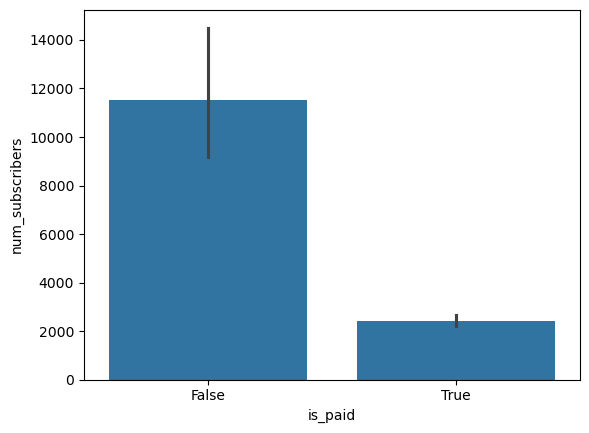

In [95]:
sns.barplot(x='is_paid',y="num_subscribers",data=data)

**Which Level Has The Highest Number of Subscribers?**

<Axes: xlabel='level', ylabel='num_subscribers'>

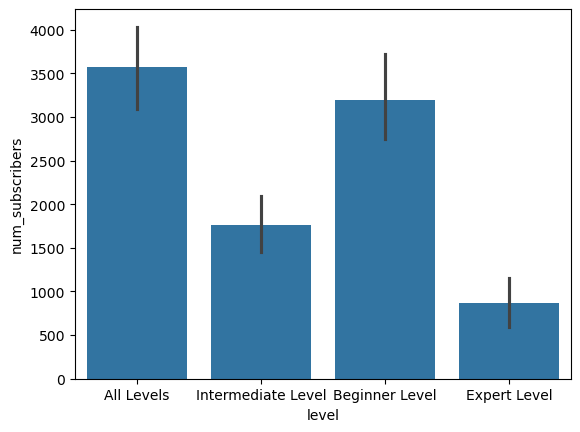

In [98]:
sns.barplot(x='level',y="num_subscribers",data=data)

**Find Most Popular Course Title**--- most popular means in terms of maxi subscriber

In [106]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [117]:
data[data['num_subscribers'].max() == data['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

**Display 10 Most Popular Courses As Per Number of Subscribers**

In [124]:
top_10=data.sort_values(by='num_subscribers',ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

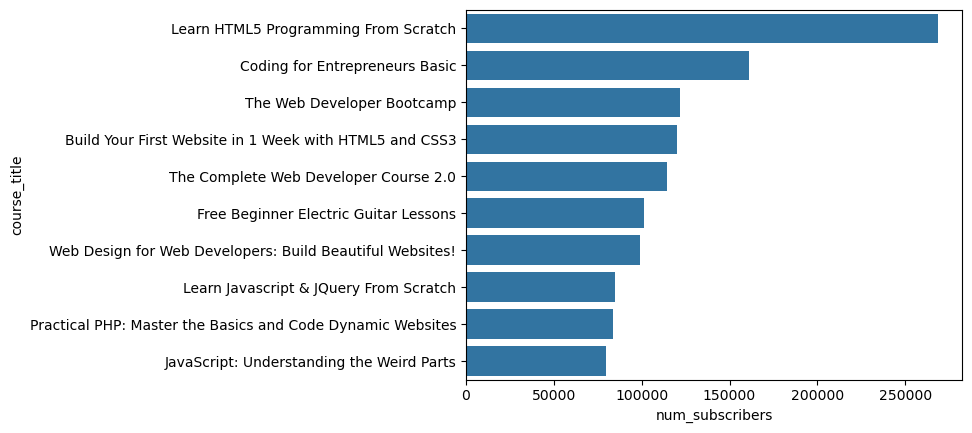

In [126]:
sns.barplot(x="num_subscribers",y="course_title",data=top_10)

**Find The Course Which Is Having The Highest Number of Reviews.**

<Axes: xlabel='subject', ylabel='num_reviews'>

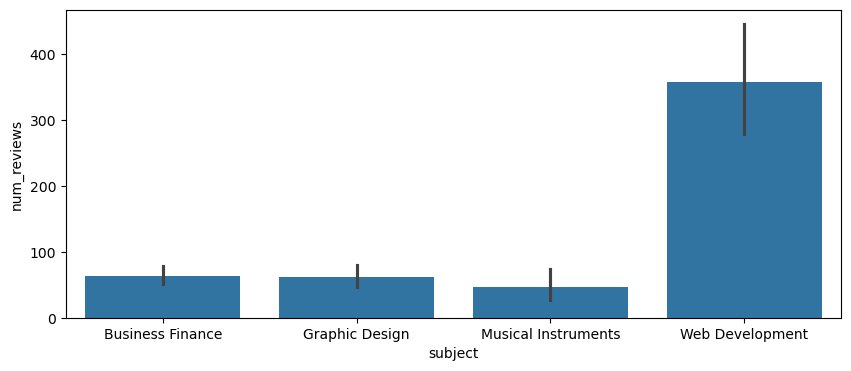

In [133]:
plt.figure(figsize=(10,4))
sns.barplot(x="subject",y="num_reviews",data=data)

**Does Price Affect the Number of Reviews?**

<Axes: xlabel='price', ylabel='num_reviews'>

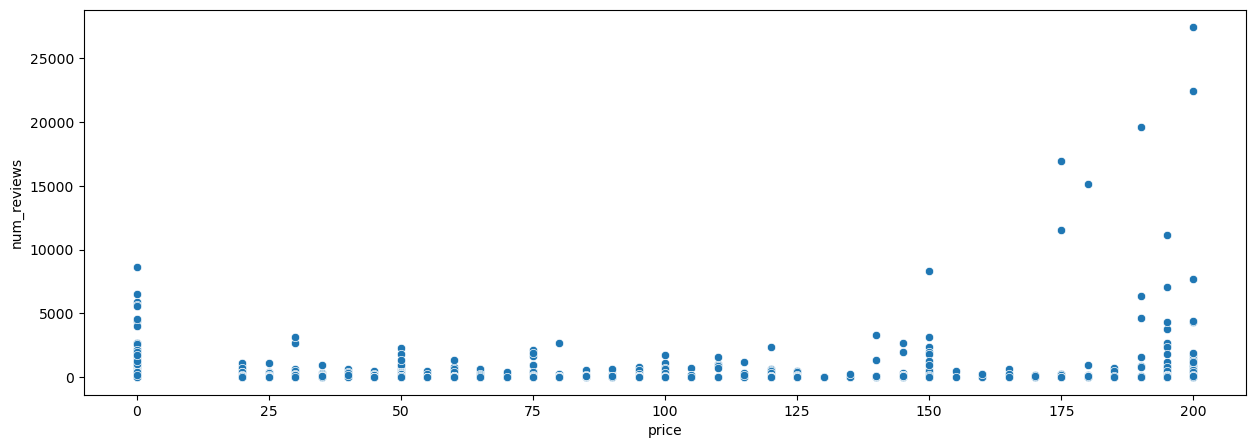

In [150]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="price",y="num_reviews",data=data)

**Find Total Number of Courses Related To Python**

In [159]:
len(data[data['course_title'].str.contains('python',case=False)])

29

**Display 10 Most Popular Python Courses As Per Number of Subscribers**

In [169]:
python_10=data[data['course_title'].str.contains('python',case=False)].sort_values(by='num_subscribers',ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

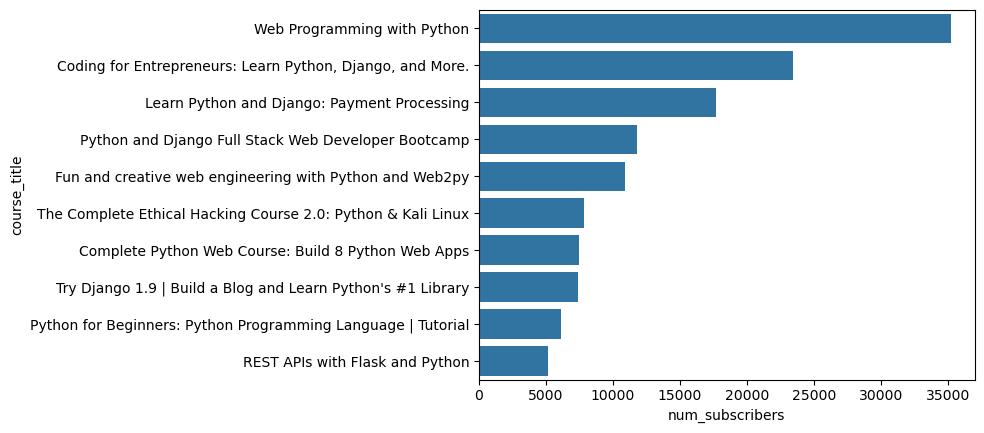

In [171]:
sns.barplot(x='num_subscribers',y='course_title',data=python_10)

**In Which Year The Highest Number of Courses Were Posted?**

In [174]:
data['year']=data['published_timestamp'].dt.year

/var/folders/l2/jhd87z2n59ngd0gm_hwq2dxr0000gn/T/ipykernel_2975/3571066919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year']=data['published_timestamp'].dt.year


In [182]:
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


<Axes: xlabel='year', ylabel='count'>

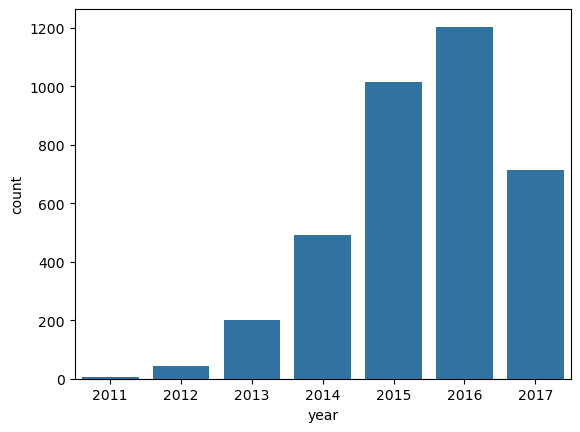

In [184]:
sns.countplot(x='year',data=data)

**Display Category-Wise Count of Posted Subjects [Year Wise]**

In [188]:
**Display Category-Wise Count of Posted Subjects [Year Wise]**

SyntaxError: invalid syntax (2798966767.py, line 1)

In [198]:
data.groupby('year')['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64

In [ ]:
1. Display Top 10 Rows of The Dataset
2. Check Last 5 Rows of The Dataset
3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
5. Check Null Values In The Dataset
6. Check For Duplicate Data and Drop Them
7. Find Out Number of Courses Per Subjects
8. For Which Levels, Udemy Courses Providing The Courses
9. Display The Count of Paid and Free Courses 
10. Which Course Has More Lectures (Free or Paid)?
11. Which Courses Have A Higher Number of Subscribers Free or Paid?
12. Which Level Has The Highest Number of Subscribers?
13. Find Most Popular Course Title
14. Display 10 Most Popular Courses As Per Number of Subscribers
15. Find The Course Which Is Having The Highest Number of Reviews.
16. Does Price Affect the Number of Reviews?
17. Find Total Number of Courses Related To Python
18. Display 10 Most Popular Python Courses As Per Number of Subscribers
19. In Which Year The Highest Number of Courses Were Posted?
20. Display Category-Wise Count of Posted Subjects [Year Wise] 